# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


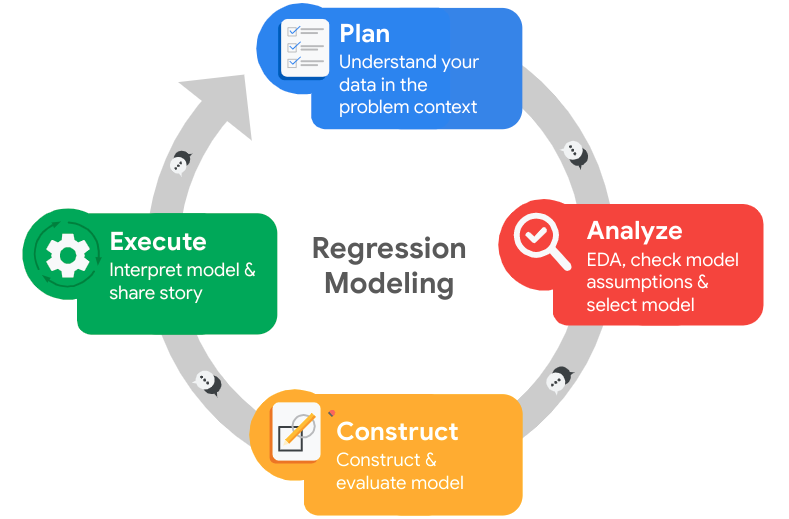

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [50]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [51]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [52]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [53]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [54]:
# Display all column names
print("Column names before renaming:")
print(df0.columns)


Column names before renaming:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [55]:
# Rename columns as needed

df0.rename(columns={
   'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',
    'Department': 'department',
    'satisfaction_level':'satisfaction'
}, inplace=True)

# Display all column names after the update
print("\nColumn names after renaming:")
print(df0.columns)




Column names after renaming:
Index(['satisfaction', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [56]:
# Check for missing values
missing_values = df0.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
satisfaction             0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [57]:
# Check for duplicates
duplicates = df0.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 3008


In [58]:
# Inspect some rows containing duplicates as needed
duplicate_rows = df0[df0.duplicated(keep=False)]
print("\nSome rows containing duplicates:")
duplicate_rows.head()


Some rows containing duplicates:


,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_no_duplicates = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
print("\nFirst few rows of dataframe after dropping duplicates:")
df_no_duplicates.head()


First few rows of dataframe after dropping duplicates:


,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

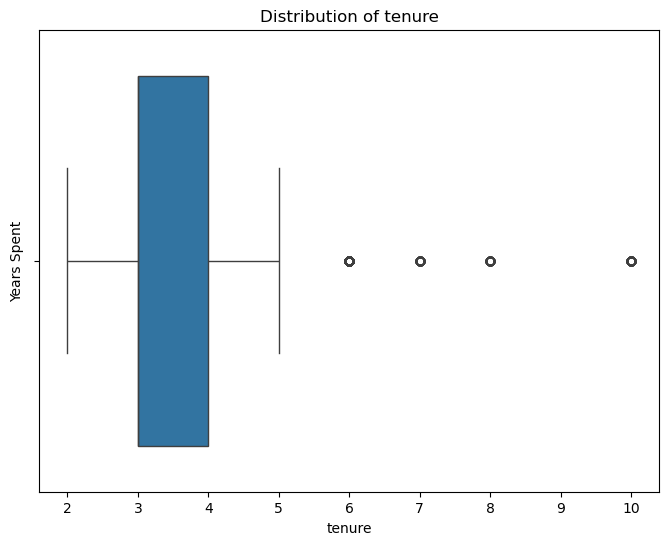

In [60]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_duplicates['tenure'])
plt.title('Distribution of tenure')
plt.ylabel('Years Spent')
plt.show()  


In [61]:
# Determine the number of rows containing outliers

# Calculate the upper and lower bounds for identifying outliers using IQR method
Q1 = df_no_duplicates['tenure'].quantile(0.25)
Q3 = df_no_duplicates['tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of rows containing outliers
outliers = df_no_duplicates[(df_no_duplicates['tenure'] < lower_bound) | (df_no_duplicates['tenure'] > upper_bound)]
num_outliers = len(outliers)

print("Lower Limit:", lower_bound)
print("Upper Limit:", upper_bound)
print("Number of rows containing outliers:", num_outliers)

Lower Limit: 1.5
Upper Limit: 5.5
Number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [62]:
# Get numbers of people who left vs. stayed
left_counts = df_no_duplicates['left'].value_counts()

# Display numbers of people who left vs. stayed
print("Number of employees who left vs. stayed:")
print(left_counts)

# Get percentages of people who left vs. stayed
total_employees = left_counts.sum()

# Display percentages of people who left vs. stayed
print("\nPercentage of employees who left: {:.2%}".format(left_counts[1] / total_employees))
print("Percentage of employees who stayed: {:.2%}".format(left_counts[0] / total_employees))



Number of employees who left vs. stayed:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of employees who left: 16.60%
Percentage of employees who stayed: 83.40%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

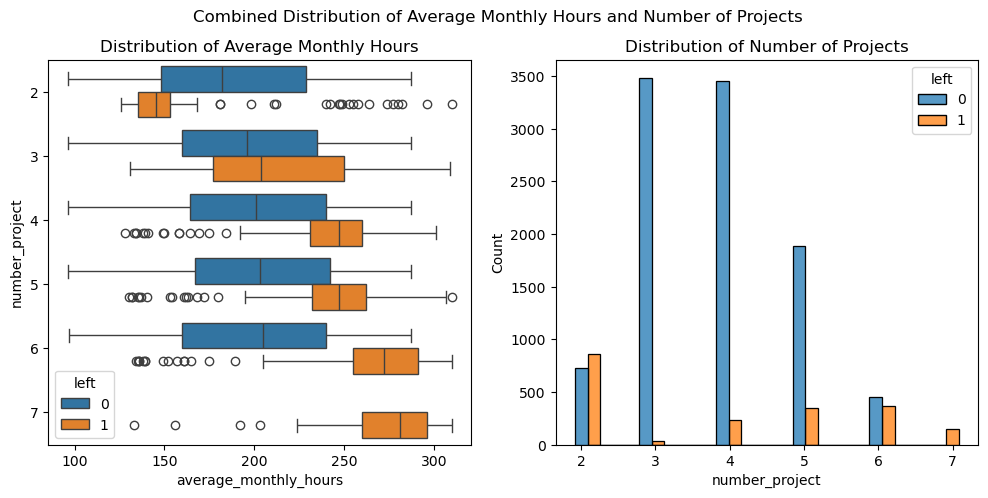

In [63]:

plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df_no_duplicates, x='average_monthly_hours', y='number_project', hue='left', orient="h")
plt.title('Distribution of Average Monthly Hours')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df_no_duplicates, x='number_project', hue='left', multiple='dodge', shrink=2, stat='count')
plt.title('Distribution of Number of Projects')


# Set super title
plt.suptitle('Combined Distribution of Average Monthly Hours and Number of Projects')

# Save figure with the super title as the filename
plt.savefig('Figures/Average Monthly Hours and Number of Projects.jpg')

plt.show()


The generated graphs provide valuable insights into employee turnover and workload dynamics within the company. Here's a summary of the key points inferred from the graphs:

1. **Variation in Work Hours and Project Involvement**:
    - Employees who left the company exhibit two distinct patterns:
        - (A) Some worked considerably fewer hours compared to their peers with the same number of projects, possibly indicating termination or resignation with reduced workload.
        - (B) Others worked significantly more hours, likely indicating voluntary resignation of high-contributing employees.
    - Notably, all employees with seven projects left the company, suggesting a possible threshold for workload tolerance.

2. **Optimal Project Load**:
    - Employees engaged in 3-4 projects demonstrate a significantly lower ratio of turnover, implying an optimal workload range.

3. **Workload Considerations**:
    - Assuming a standard workweek of 40 hours and two weeks of vacation per year, the average monthly working hours would be approximately 166.67 hours.
    - However, most employee groups, including those who remained with the company, surpassed this threshold, indicating potential overwork across the organization.

4. **Further Analysis**:
    - Confirming the departure of all employees with seven projects would validate the observed pattern and provide additional insights into workload thresholds and turnover predictors.

These insights suggest the importance of workload management and its impact on employee retention within the organization. Further analysis and action may be warranted to address potential overwork and optimize project assignments to maintain employee satisfaction and reduce turnover.

In [64]:
# Get value counts of stayed/left for employees with 7 projects
df_no_duplicates[df_no_duplicates['number_project'] == 7]['left'].value_counts()


left
1    145
Name: count, dtype: int64

### This confirms that all employees with 7 projects did leave.

### Next we can explore the satisfaction levels in relation to the number or working hours and tenure.

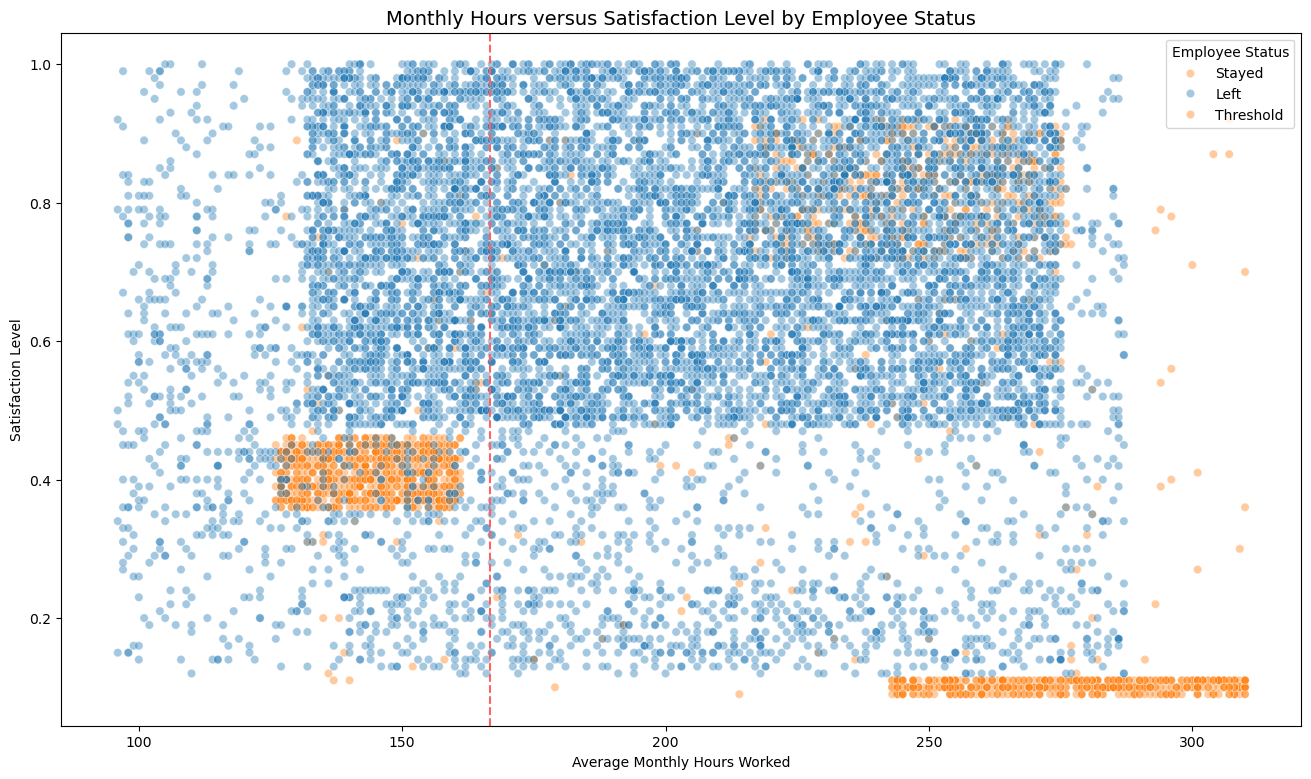

In [65]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_no_duplicates, x='average_monthly_hours', y='satisfaction', hue='left', alpha=0.4)

# Add vertical line representing assumed threshold for average monthly working hours
plt.axvline(x=166.67, color='#ff6361', label='Threshold (166.67 hrs./mo.)', ls='--')

# Update legend labels
plt.legend(title='Employee Status', labels=['Stayed', 'Left', 'Threshold'])

# Add title
plt.title('Monthly Hours versus Satisfaction Level by Employee Status', fontsize=14)
plt.xlabel('Average Monthly Hours Worked')
plt.ylabel('Satisfaction Level')
plt.savefig("Figures/Monthly Hours versus Satisfaction.jpg")
plt.show()

Here's a summary of the insights derived from the scatterplot:

1. **High Workload and Low Satisfaction**:
    - A significant group of employees worked approximately 240-315 hours per month, which translates to over 75 hours per week for a full year.
    - Despite their extensive work hours, their satisfaction levels were close to zero, indicating a potential correlation between high workload and low job satisfaction.

2. **Normal Work Hours with Moderate Satisfaction**:
    - Another group of departing employees had more typical working hours, yet their satisfaction levels hovered around 0.4.
    - It's plausible that these employees might have felt pressured to work longer hours due to the high workload of their peers, potentially contributing to a decrease in their satisfaction levels.

3. **Moderate Work Hours with Moderate to High Satisfaction**:
    - A distinct group worked approximately 210-280 hours per month, accompanied by satisfaction levels ranging from 0.7 to 0.9.
    - Despite a moderate workload, these employees reported relatively high satisfaction levels, suggesting a positive correlation between manageable work hours and job satisfaction.


These insights highlight the complex relationship between average monthly hours worked, satisfaction levels, and employee turnover, suggesting the need for thorough examination and potential intervention to improve employee satisfaction and retention.

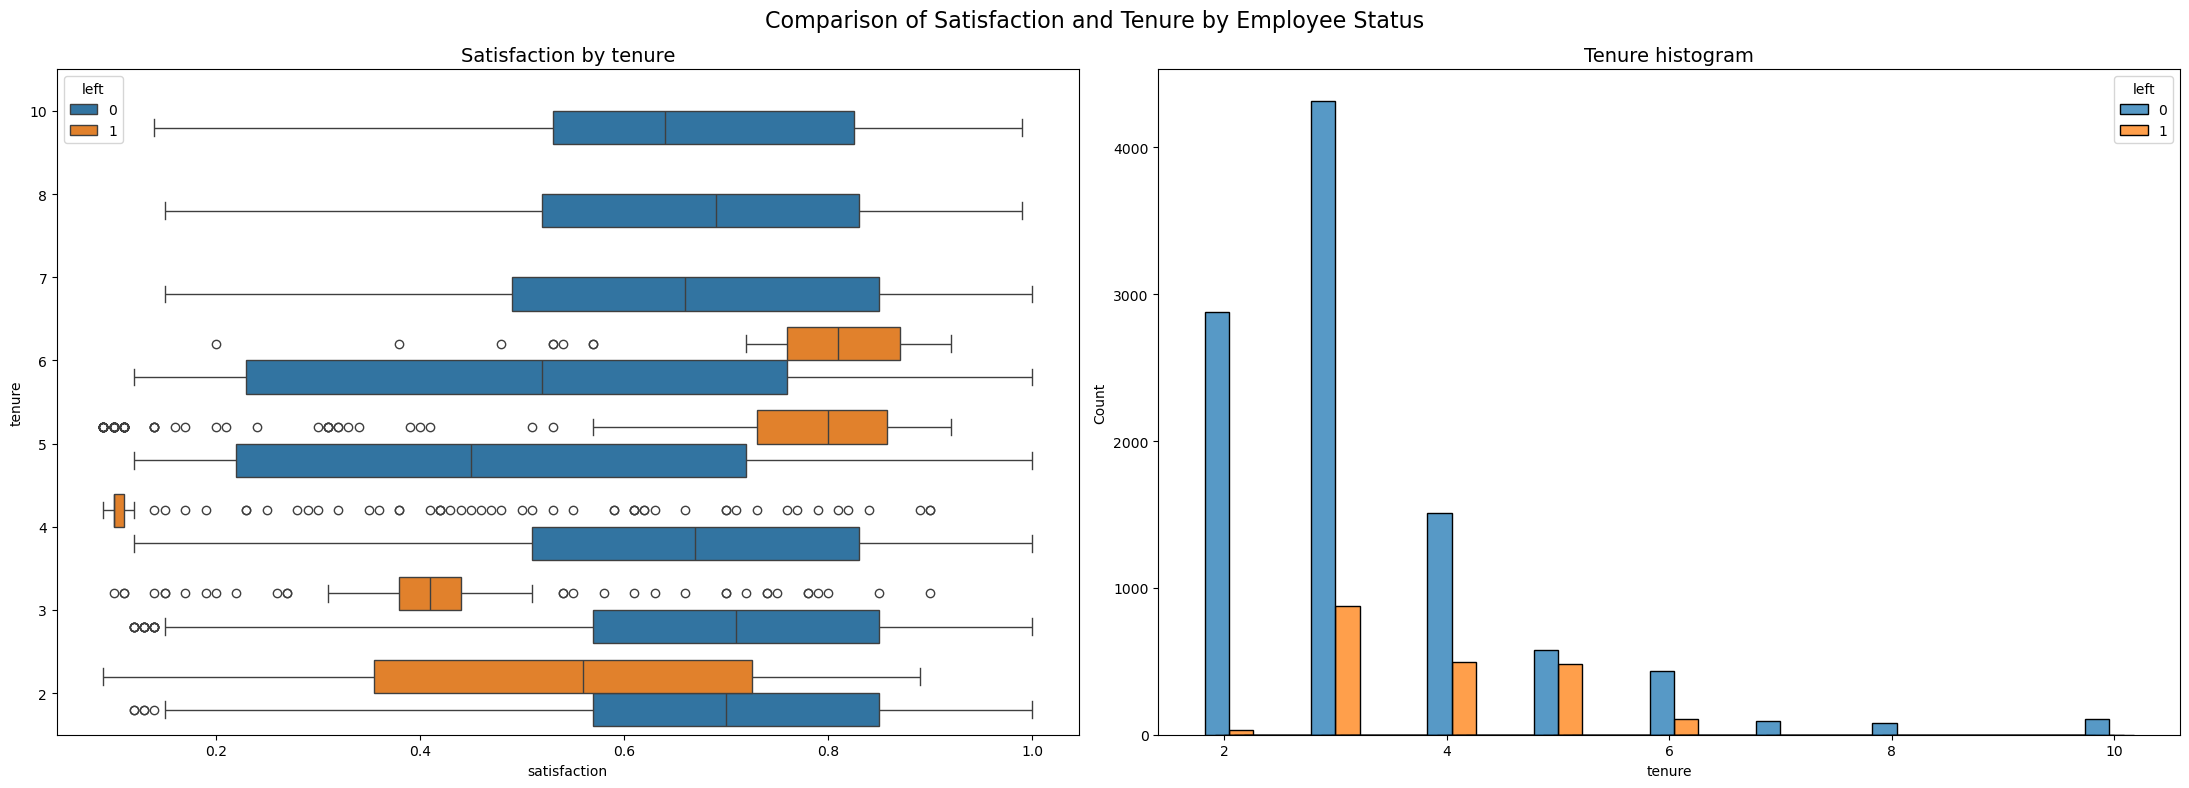

In [66]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df_no_duplicates, x='satisfaction', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df_no_duplicates[df_no_duplicates['left'] == 0]['tenure']
tenure_left = df_no_duplicates[df_no_duplicates['left'] == 1]['tenure']
sns.histplot(data=df_no_duplicates, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

# Set super title for the figure
fig.suptitle('Comparison of Satisfaction and Tenure by Employee Status', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the combined plot with the specified filename
plt.savefig('Figures/Satisfaction_Tenure_Comparison.jpg')

plt.show()

The plot reveals several key observations:

1. **Two Distinct Groups of Departing Employees**: 
   - Employees who left can be divided into two categories: those with short tenures and low satisfaction, and those with medium-length tenures and high satisfaction.

2. **Concerning Satisfaction Levels for Four-Year Employees**: 
   - Employees with a four-year tenure exhibited notably low satisfaction levels among those who left, suggesting a potential issue that warrants investigation.

3. **High Retention among Longest-Tenured Employees**: 
   - Employees with the longest tenures showed high retention, with satisfaction levels comparable to newer employees who stayed.

4. **Scarcity of Longer-Tenured Employees**: 
   - There is a relative scarcity of longer-tenured employees in the dataset, raising questions about the representation of senior or experienced staff.

Calculating mean and median satisfaction scores for employees who left versus those who stayed can provide further insights into satisfaction disparities and their impact on turnover.

In [67]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df_no_duplicates.groupby(['left'])['satisfaction'].agg([np.mean,np.median])

/tmp/ipykernel_96369/3132861402.py:2: FutureWarning: The provided callable <function mean at 0x731d65fb5bd0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_no_duplicates.groupby(['left'])['satisfaction'].agg([np.mean,np.median])
/tmp/ipykernel_96369/3132861402.py:2: FutureWarning: The provided callable <function median at 0x731d6460ad40> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_no_duplicates.groupby(['left'])['satisfaction'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The analysis reveals:

1. **Lower Satisfaction Scores for Departing Employees**: 
   - Mean and median satisfaction scores of departing employees are lower compared to those who stayed, indicating dissatisfaction as a potential factor in turnover.

2. **Skewed Satisfaction Distribution among Stayed Employees**: 
   - Among employees who stayed, the mean satisfaction score is slightly lower than the median, suggesting a left-skewed distribution of satisfaction levels.

For further analysis, examining salary levels across different tenures can provide insights into potential correlations between compensation, tenure, and employee retention.

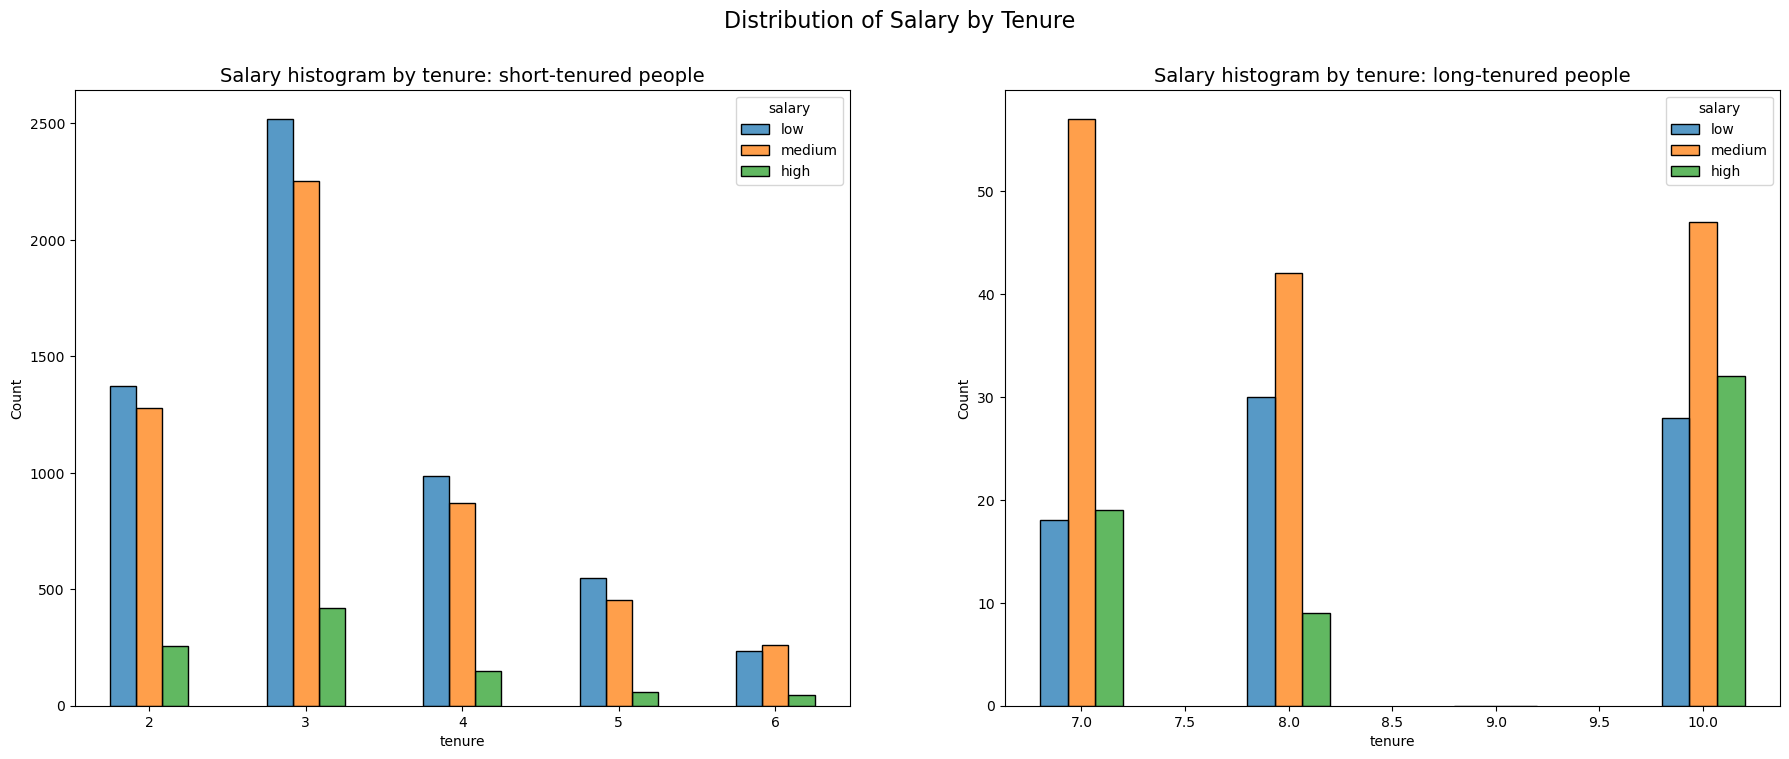

In [68]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Define short-tenured employees
tenure_short = df_no_duplicates[df_no_duplicates['tenure'] < 7]

# Define long-tenured employees
tenure_long = df_no_duplicates[df_no_duplicates['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=True,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize=14)

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=True,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=14)


fig.suptitle('Distribution of Salary by Tenure', fontsize=16)

fig.savefig('Figures/Distribution of Salary by Tenure.jpg')

plt.show()

The provided plots reveal:

1. **Salary Distribution Across Tenures**:
   - For short-tenured employees, there's no clear pattern indicating a disproportionate presence of higher-paid individuals.
   - Similarly, among long-tenured employees, the distribution of salary levels appears relatively balanced across different tenure lengths.


In [69]:
# save the latest dataset as a csv file to be used in model building
df_no_duplicates.to_csv('HR_capstone_dataset_no_duplicates.csv', index=False)